<h1>Visualizando dados em quatro dimensões com matplotlib</h1>

<h3>Bibliotecas</h3>

In [86]:
# importando bibliotecas
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from matplotlib import cm
from IPython.display import clear_output

<h3>Dados</h3>

In [98]:
# Carrega o conjunto de dados Wine Data Set
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

# Atribui os nomes corretos a cada variável
data.columns = [
    'Quality',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',               
]

# visualiza as 5 primeiras linhas
data.head(5)

,Quality,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h3>Filtro e frequência em 1ª e 2ª classe</h3>

In [99]:
# filtro: apenas 1ª e 3ª classe
data = data[data['Quality']!=2]

# frequência por classe
data['Quality'].value_counts()

1    59
3    48
Name: Quality, dtype: int64

<h3>Escolhendo variáveis</h3>

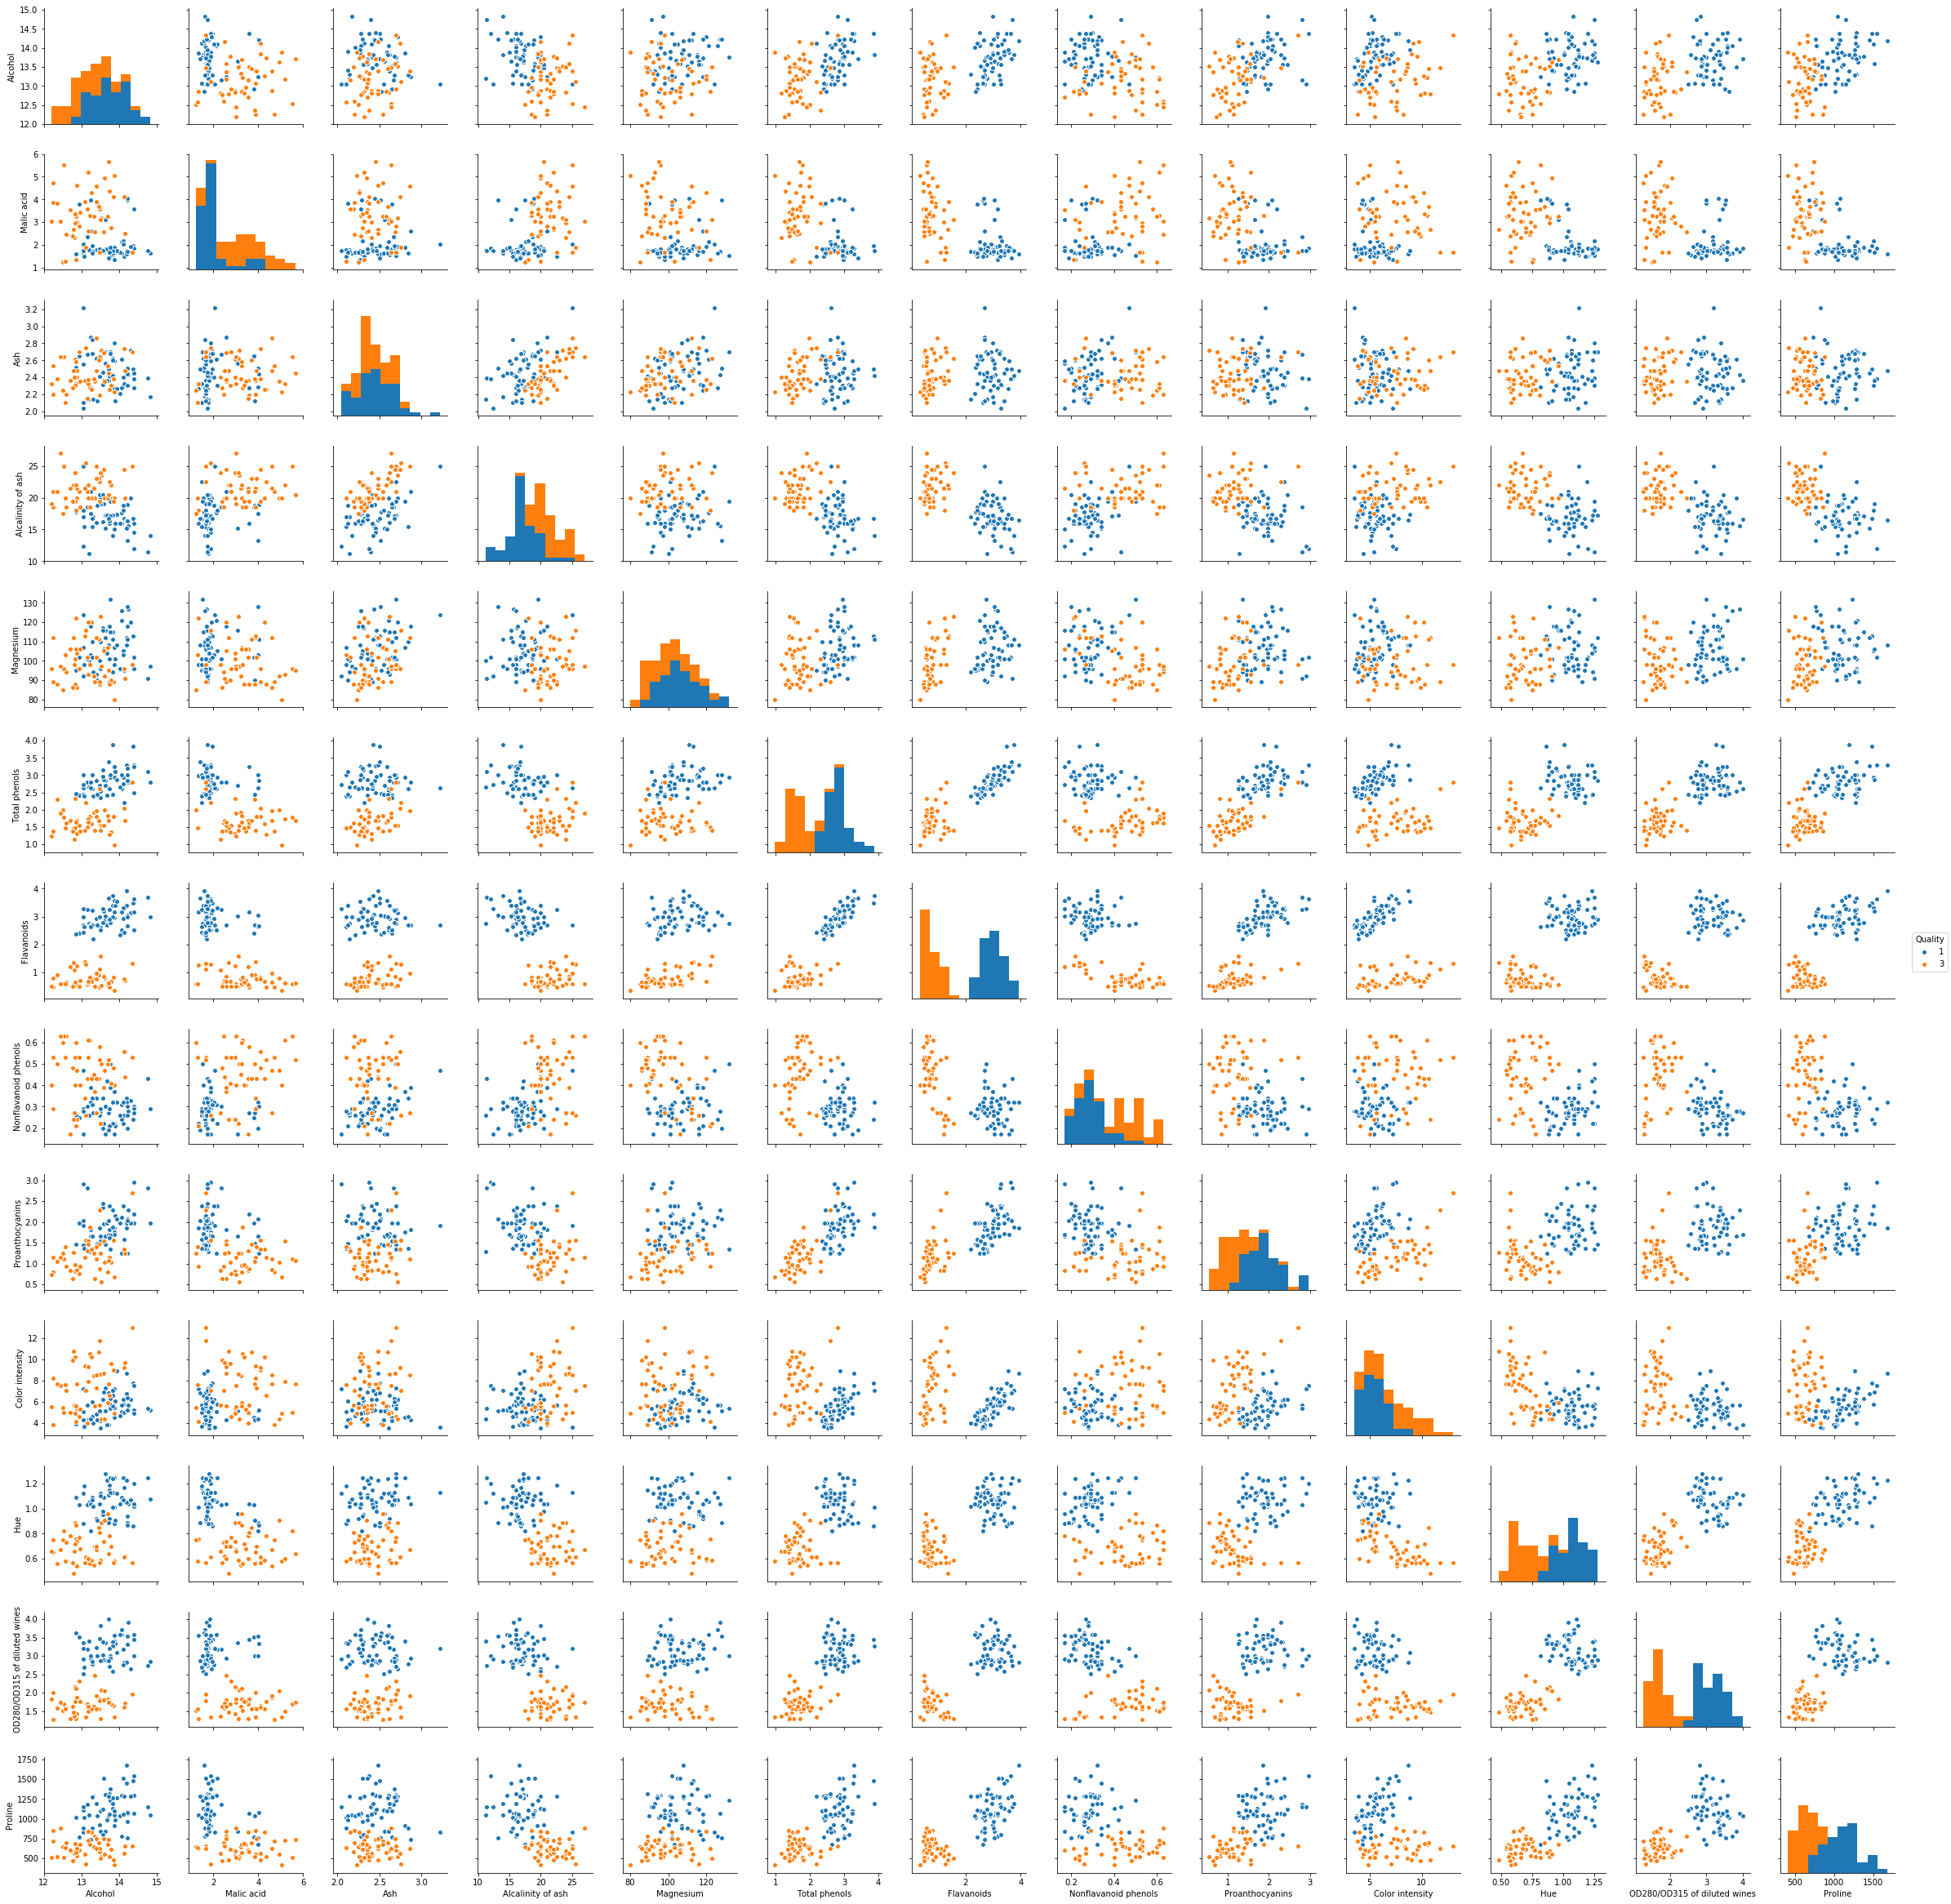

In [101]:
# pair plot
sns.pairplot(
    data,
    hue="Quality",
    vars=[
        d for d in data.columns if d!='Quality'
    ]
)

In [46]:
# filtro: 4 variáveis
data = data[[
    'Quality',
    'OD280/OD315 of diluted wines',
    'Hue',
    'Proline'
]]

<h3>Visualização das 4 variáveis escolhidas</h3>

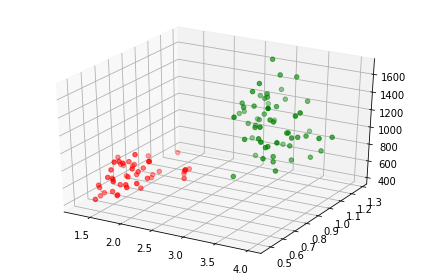

In [102]:
# cria a janela da figura
fig = plt.figure()

# carrega os eixos criando um a mais se necessário
ax = fig.gca(projection='3d')

# cria lista de cor considerando qualidade
colors = data['Quality'].map({1:'g',3:'r'}).values

# cria o gráfico
ax.scatter(
    data['OD280/OD315 of diluted wines'],
    data['Hue'],
    data['Proline'],
    c=colors
)

# ajusta e mostra o gráfico
plt.tight_layout()
plt.show()

<h3>Inserindo legendas e nomeando os eixos</h3>

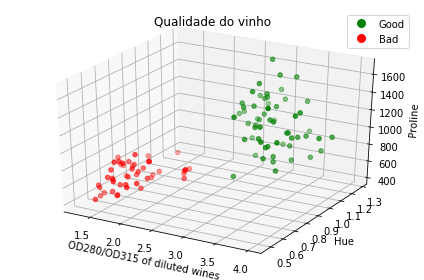

In [104]:
# cria a janela da figura
fig = plt.figure()

# carrega os eixos criando um a mais se necessário
ax = fig.gca(projection='3d')

# cria lista de cor considerando qualidade
colors = data['Quality'].map({1:'g',3:'r'}).values

# cria o gráfico
ax.scatter(
    data['OD280/OD315 of diluted wines'],
    data['Hue'],
    data['Proline'],
    c=colors
)

# Nomeia os eixos
plt.title("Qualidade do vinho")
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Hue')
ax.set_zlabel('Proline')

# configura legendas
legend_elements = [
    Line2D([0], [0],
        marker='o',
        color='w',
        label='Good',
        markerfacecolor='g',
        markersize=10
    ),
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        label='Bad',
        markerfacecolor='r',
        markersize=10
    )
]
                   
# cria legendas
ax.legend(handles=legend_elements, loc='best')



plt.tight_layout()
plt.show()

<h3>Animação mostrando vários ângulos</h3>

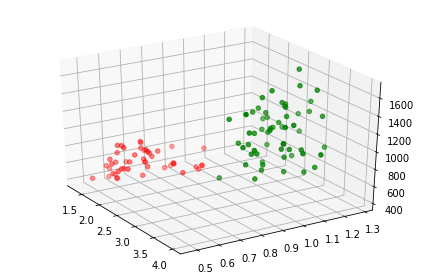

In [106]:
for angle in range(30,330,2):

    # faz o gráfico
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(
        data['OD280/OD315 of diluted wines'],
        data['Hue'],
        data['Proline'],
        color=colors)
    
    # configura o ângulo
    ax.view_init(30,angle)
    
    # mostra
    plt.tight_layout()
    plt.gca()
    clear_output(wait=True)
    plt.show()

<h3>Animação mostrando vários ângulos com título, legendas, rótulos e salvando imagens</h3>

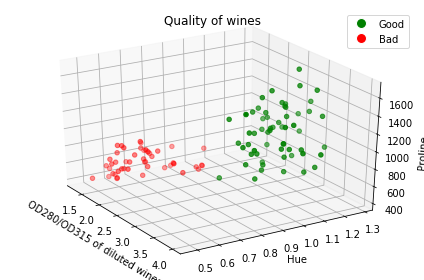

In [85]:
for angle in range(30,330,2):

    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(
        data['OD280/OD315 of diluted wines'],
        data['Hue'],
        data['Proline'],
        color=c_list)
    
    # Set the view
    ax.view_init(30,angle)
    
    # Set labels
    plt.title('Quality of wines')
    plt.xlabel('OD280/OD315 of diluted wines')
    plt.ylabel('Hue')
    ax.set_zlabel('Proline')

    # save plots
    filename='wine'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    
    # Create customized legends 
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Good',markerfacecolor='g', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Bad',markerfacecolor='r', markersize=10)
    ]

    # Make legend
    ax.legend(handles=legend_elements, loc='best')
    plt.tight_layout()
    plt.gca()
    clear_output(wait=True)
    plt.show()